# Linear Transformations


Let's apply linear transformation $L$ to each of the vectors $e_1$ and $e_2$: $L(e_1)=Ae_1$ and $L(e_2)=Ae_2$. If you put vectors $\{e_1, e_2\}$ into columns of a matrix and perform matrix multiplication

$$A\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}Ae_1 & Ae_2\end{bmatrix}=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix},\tag{3}$$

you can note that $\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ (identity matrix). Thus, $A\begin{bmatrix}e_1 & e_2\end{bmatrix} = AI=A$, and

$$A=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix}.\tag{4}$$

This is a matrix with the columns that are the images of the vectors of the standard basis. 

This choice of vectors \{$e_1, e_2$\} provides opportinuty for the visual representation of the linear transformation $L$ (you will see the examples below).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

img = np.loadtxt('data/image.txt')
print('Shape: ',img.shape)
print(img)

Shape:  (2, 329076)
[[ 399.20891527  400.20891527  404.20891527 ...  -88.79108473
   -88.79108473  -88.79108473]
 [ 534.18310664  534.18310664  534.18310664 ... -476.81689336
  -477.81689336 -478.81689336]]


The image is just a $2 \times 329076$ matrix where each column is a vector in the plane. 

So we can get all $x$ coordinates by calling `img[0]` and all $y$ coordinates by calling `img[1]`

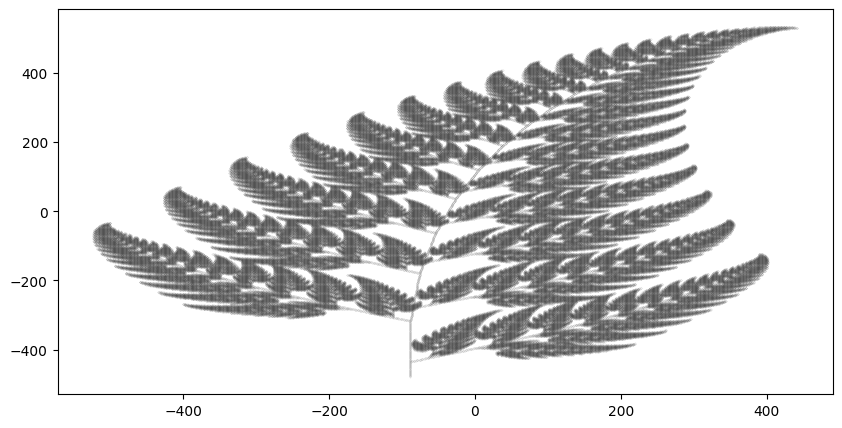

In [2]:
plt.figure(figsize = (10,5))
plt.scatter(x = img[0], y = img[1], s = 0.001, color = 'black')
plt.show()

In [3]:
e1 = np.array([[1], [0]]) # Vector of pixels along x-axis
e2 = np.array([[0], [1]]) # Vector of pixels along y-axis
V = np.hstack((e1, e2))

A = np.array([[2,0], [1, 3]])

w = A @ V

print('Pixels Matrix V:\n', V)
print('\nA Matrix (Linear Transformation):\n', A)
print('\nTransformed Pixels Matrix w:\n', w)

Pixels Matrix V:
 [[1 0]
 [0 1]]

A Matrix (Linear Transformation):
 [[2 0]
 [1 3]]

Transformed Pixels Matrix w:
 [[2 0]
 [1 3]]


## Standard Linear Transformation

$$
T v =
\begin{bmatrix}
a & 0 \\
0 & a
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2 & \dots & x_n \\
y_1 & y_2 & \dots & y_n
\end{bmatrix}
=
\begin{bmatrix}
a x_1 & a x_2 & \dots & a x_n \\
a y_1 & a y_2 & \dots & a y_n
\end{bmatrix}
$$


In [4]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    
    return w
    

def transform_vectors(T, v1, v2):
    ''' 
    T : Linear transformation function
    v1, v2 : Vectors to be transformed
    return : Transformed vectors
    '''
    V = np.hstack((v1, v2))
    W = T(V)
    
    return W
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

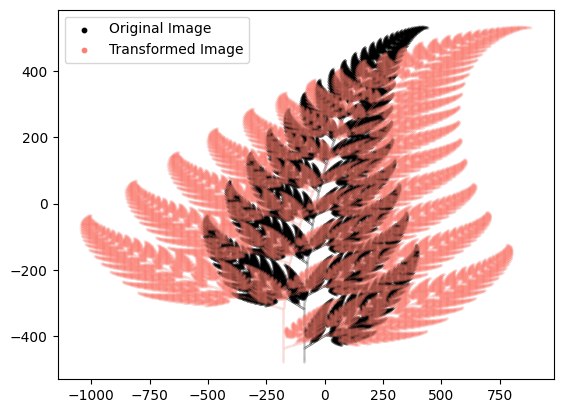

In [5]:
plt.scatter(x = img[0], y = img[1], s = 0.001, color = 'black', label = 'Original Image')
plt.scatter(T_hscaling(img)[0], T_hscaling(img)[1], s = 0.001, color = 'salmon', label = 'Transformed Image')
plt.legend(markerscale = 100)
plt.show()

For a vector $v = (x, y)$:

$$
A v =
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
-x \\
y
\end{bmatrix}, \tag{1}
$$

x sign change but y not. 

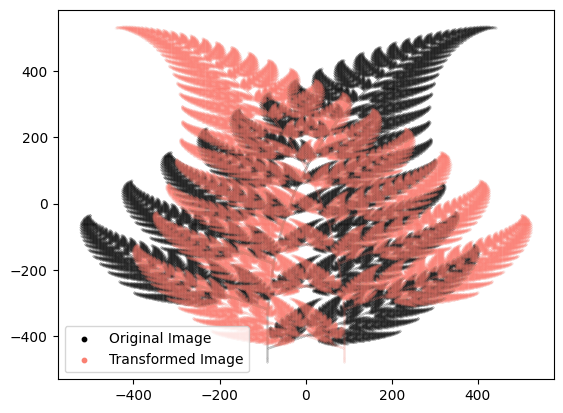

In [6]:
def T_reflection_yaxis(v):
    ''' 
    The Function ccorresponds to the reflection about y-axis
    '''
    A = np.array([[-1,0], [0,1]]) 
    w = A @ v
    
    return w

plt.scatter(img[0], img[1], s = 0.001, color = 'black', label = 'Original Image') 
plt.scatter(T_reflection_yaxis(img)[0], T_reflection_yaxis(img)[1], s = 0.001, color = 'salmon', label = 'Transformed Image')
plt.legend(markerscale = 100)
plt.show()

### Stretching by a scalar

The next linear transformation is a stretching by a non-zero scalar. In other words, fixing a scalar $a \neq 0$, the linear transformation in the plane is such that:

$$T(v) = a \cdot v$$

If $v = (x,y)$, then $T(v) = T((x,y)) = (ax, ay)$.

In [7]:
def T_stretch(a, v):
    """
    Performs a 2D stretching transformation on a vector v using a stretching factor a.

    Args:
        a (float): The stretching factor.
        v (numpy.array): The vector (or vectors) to be stretched.

    Returns:
        numpy.array: The stretched vector.
    """
    # Define the transformation matrix
    T = np.array([[a ,0], [0, a]])
    w = T @ v

    return w

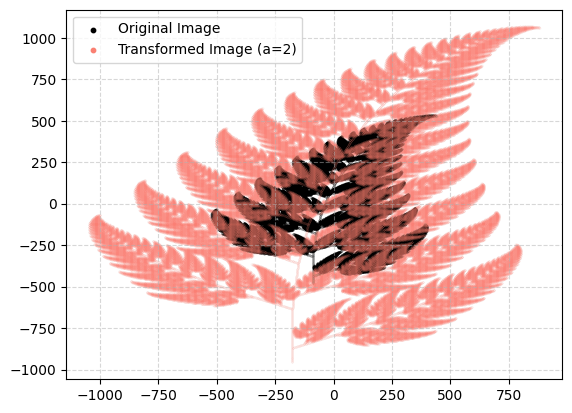

In [8]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black', label = 'Original Image') 
plt.scatter(T_stretch(2,img)[0], T_stretch(2,img)[1], s = 0.001, color = 'salmon', label = 'Transformed Image (a=2)')
plt.legend(markerscale = 100)
plt.grid(True, ls = '--', alpha = 0.5)
plt.show()

### Rotation

To rotate a vector in the plane by an angle of $\theta$ (radians), the matrix related to this transformation is given by:


$$M = \begin{bmatrix} \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} $$


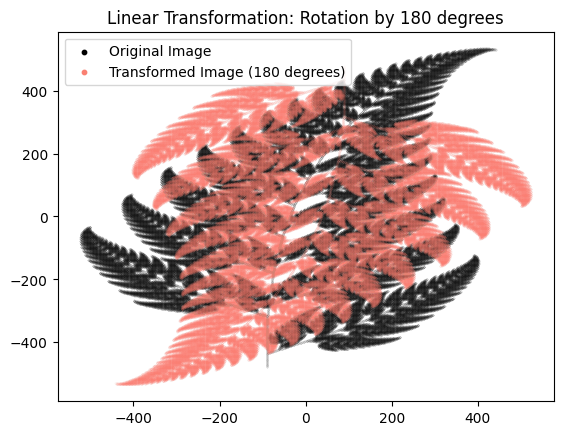

In [9]:
def T_rotation(theta, v):
    """
    Performs a 2D rotation transformation on an array v using a rotation angle theta.

    Args:
        theta (float): The rotation angle in radians.
        v (np.array): The array to be rotated.

    Returns:
        np.array: The rotated array.
    """

    T = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    w = T @ v
    return w

plt.scatter(img[0], img[1], s = 0.001, color = 'black', label = 'Original Image') 
plt.scatter(T_rotation(theta = np.pi,v = img)[0], T_rotation(theta = np.pi,v = img)[1], s = 0.001, color = 'salmon', label = 'Transformed Image (180 degrees)')
plt.title('Linear Transformation: Rotation by 180 degrees', fontsize = 12)
plt.legend(markerscale = 100)
plt.show()

In [10]:
def compress(a, v):
    T = np.array([[a, 0], 
                  [0, a]])
    W = T @ v
    return W

img_compressed_half = compress(0.5, img)
img_compressed_tiers = compress(0.3, img)
img_compressed_half

array([[ 199.60445763,  200.10445763,  202.10445763, ...,  -44.39554237,
         -44.39554237,  -44.39554237],
       [ 267.09155332,  267.09155332,  267.09155332, ..., -238.40844668,
        -238.90844668, -239.40844668]])

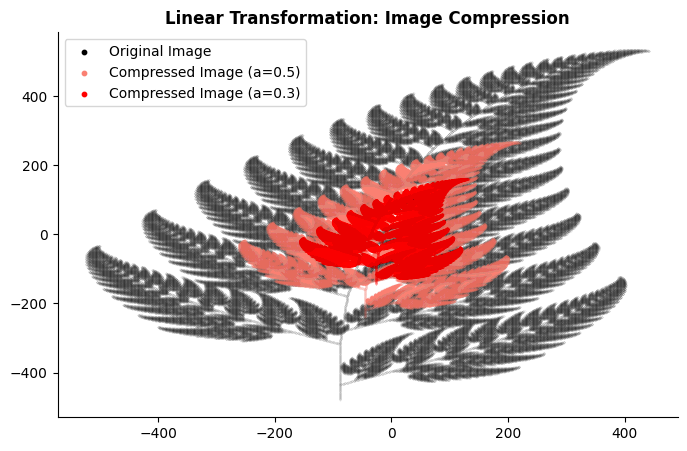

In [11]:
plt.figure(figsize = (8, 5))
plt.scatter(img[0], img[1], s = 0.001, color = 'black', label = 'Original Image') 
plt.scatter(img_compressed_half[0], img_compressed_half[1], s = 0.001, color = 'salmon', label = 'Compressed Image (a=0.5)')
plt.scatter(img_compressed_tiers[0], img_compressed_tiers[1], s = 0.001, color = 'red', label = 'Compressed Image (a=0.3)')
plt.title('Linear Transformation: Image Compression', fontsize = 12, fontweight = 'bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(markerscale = 100)
plt.show()

In [12]:
img.shape

(2, 329076)